In [9]:
import tensorflow as tf
data=tf.keras.datasets.cifar10.load_data()

# Import Data

In [10]:
(X_train, y_train), (X_test, y_test) = data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


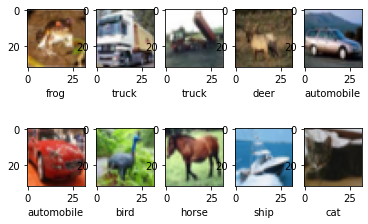

In [11]:
import matplotlib.pyplot as plt
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in range(10):
    # define subplot
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(labelNames[int(y_train[i])])
plt.show()

Data is of various items, ranging from animals to vehicles. They are also in colour

In [12]:
import pandas as pd
i=0
for i in range(10):
    print(i,'y_train: ', list(y_train).count(i))
print('#'*10)
i=0
for i in range(10):
    print(i,'y_test: ', list(y_test).count(i))

0 y_train:  5000
1 y_train:  5000
2 y_train:  5000
3 y_train:  5000
4 y_train:  5000
5 y_train:  5000
6 y_train:  5000
7 y_train:  5000
8 y_train:  5000
9 y_train:  5000
##########
0 y_test:  1000
1 y_test:  1000
2 y_test:  1000
3 y_test:  1000
4 y_test:  1000
5 y_test:  1000
6 y_test:  1000
7 y_test:  1000
8 y_test:  1000
9 y_test:  1000


Model is balanced with the same count for each class

In [13]:
import numpy as np 
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
from tensorflow.compat.v1.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
seed = 100
np.random.seed(seed)

# Model 1, incrementally increasing Conv2D

In [15]:
#model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
optim=SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 3s - loss: 1.8421 - accuracy: 0.3438 - val_loss: 1.6790 - val_accuracy: 0.4051
Epoch 2/100
500/500 - 2s - loss: 1.5502 - accuracy: 0.4520 - val_loss: 1.5144 - val_accuracy: 0.4699
Epoch 3/100
500/500 - 2s - loss: 1.4062 - accuracy: 0.5021 - val_loss: 1.3699 - val_accuracy: 0.5121
Epoch 4/100
500/500 - 2s - loss: 1.2967 - accuracy: 0.5407 - val_loss: 1.3067 - val_accuracy: 0.5388
Epoch 5/100
500/500 - 2s - loss: 1.2126 - accuracy: 0.5719 - val_loss: 1.2302 - val_accuracy: 0.5648
Epoch 6/100
500/500 - 2s - loss: 1.1409 - accuracy: 0.5976 - val_loss: 1.2065 - val_accuracy: 0.5780
Epoch 7/100
500/500 - 2s - loss: 1.0749 - accuracy: 0.6217 - val_loss: 1.1616 - val_accuracy: 0.5903
Epoch 8/100
500/500 - 2s - loss: 1.0183 - accuracy: 0.6448 - val_loss: 1.1186 - val_accuracy: 0.6105
Epoch 9/100
500/500 - 2s - loss: 0.9658 - accuracy: 0.6629 - val_loss: 1.0909 - val_accuracy: 0.6186
Epoch 10/100
500/500 - 2s - loss: 0.9184 - accuracy: 0.6809 - val_loss: 1.0383 - val_accura

In [17]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 33.94%


Very bad accuracy since error is at 30%, precision is also not good.

In [18]:
from sklearn.metrics import classification_report

predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.67      0.71      0.69      1000
  automobile       0.77      0.77      0.77      1000
        bird       0.55      0.54      0.55      1000
         cat       0.46      0.46      0.46      1000
        deer       0.61      0.63      0.62      1000
         dog       0.57      0.54      0.55      1000
        frog       0.73      0.74      0.73      1000
       horse       0.71      0.73      0.72      1000
        ship       0.79      0.76      0.78      1000
       truck       0.73      0.73      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



Accuracy and error curves do not intersect, but instead form an almost parallel line after 20 epochs.

This could mean that there is problems with overfitting

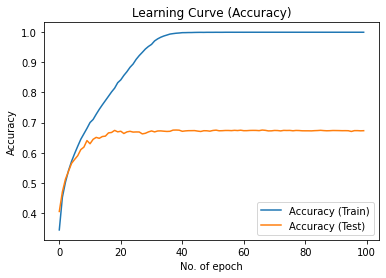

In [19]:
import matplotlib.pyplot as plt
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

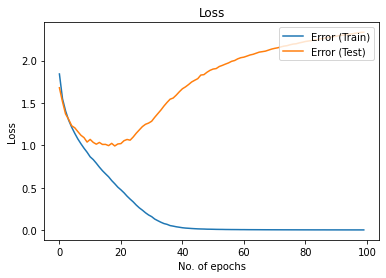

In [20]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='upper right')
plt.show()

# Model 2
### VGG Like Model
VGG is an image classification model.
A modified version with fewer pairs of Conv2D is used here

In [21]:
#enumulate VGG, model 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = model.fit(X_train, y_train, epochs=100, batch_size=80, 
                    validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 4s - loss: 1.9798 - accuracy: 0.2725 - val_loss: 1.7589 - val_accuracy: 0.3621
Epoch 2/100
500/500 - 3s - loss: 1.6071 - accuracy: 0.4159 - val_loss: 1.5090 - val_accuracy: 0.4581
Epoch 3/100
500/500 - 3s - loss: 1.4616 - accuracy: 0.4697 - val_loss: 1.3642 - val_accuracy: 0.5081
Epoch 4/100
500/500 - 3s - loss: 1.3511 - accuracy: 0.5148 - val_loss: 1.2788 - val_accuracy: 0.5434
Epoch 5/100
500/500 - 3s - loss: 1.2733 - accuracy: 0.5455 - val_loss: 1.2124 - val_accuracy: 0.5719
Epoch 6/100
500/500 - 3s - loss: 1.1977 - accuracy: 0.5724 - val_loss: 1.1506 - val_accuracy: 0.5958
Epoch 7/100
500/500 - 3s - loss: 1.1306 - accuracy: 0.5993 - val_loss: 1.1150 - val_accuracy: 0.6042
Epoch 8/100
500/500 - 3s - loss: 1.0779 - accuracy: 0.6191 - val_loss: 1.0537 - val_accuracy: 0.6303
Epoch 9/100
500/500 - 3s - loss: 1.0254 - accuracy: 0.6365 - val_loss: 1.0116 - val_accuracy: 0.6479
Epoch 10/100
500/500 - 3s - loss: 0.9729 - accuracy: 0.6581 - val_loss: 0.9838 - val_accura

In [23]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 25.58%


Error and precision is better. It can be said that the model has improved

In [24]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.75      0.80      0.78      1000
  automobile       0.89      0.82      0.86      1000
        bird       0.70      0.59      0.64      1000
         cat       0.60      0.52      0.56      1000
        deer       0.67      0.73      0.70      1000
         dog       0.66      0.64      0.65      1000
        frog       0.81      0.79      0.80      1000
       horse       0.75      0.80      0.78      1000
        ship       0.84      0.86      0.85      1000
       truck       0.76      0.89      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



As the error curve for test set diverges further from the train set after subsequent epochs, this means that there is problems with overfitting after around 25 epochs

Further improvements will need to be made

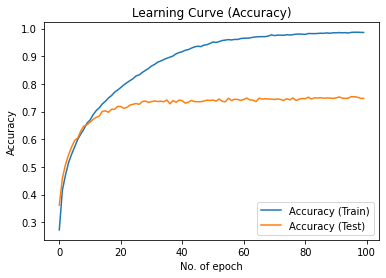

In [25]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

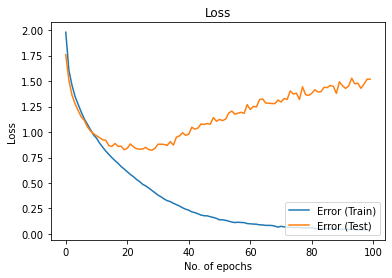

In [26]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 3
### Batch Normalized model

In [27]:
#model 3
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 5s - loss: 1.6620 - accuracy: 0.4212 - val_loss: 1.4032 - val_accuracy: 0.4899
Epoch 2/100
500/500 - 4s - loss: 1.2363 - accuracy: 0.5592 - val_loss: 1.2582 - val_accuracy: 0.5614
Epoch 3/100
500/500 - 4s - loss: 1.0629 - accuracy: 0.6241 - val_loss: 1.0981 - val_accuracy: 0.6141
Epoch 4/100
500/500 - 4s - loss: 0.9411 - accuracy: 0.6680 - val_loss: 1.1080 - val_accuracy: 0.6179
Epoch 5/100
500/500 - 3s - loss: 0.8497 - accuracy: 0.7038 - val_loss: 1.0166 - val_accuracy: 0.6497
Epoch 6/100
500/500 - 4s - loss: 0.7683 - accuracy: 0.7308 - val_loss: 0.9401 - val_accuracy: 0.6756
Epoch 7/100
500/500 - 3s - loss: 0.7013 - accuracy: 0.7561 - val_loss: 0.8987 - val_accuracy: 0.6875
Epoch 8/100
500/500 - 4s - loss: 0.6455 - accuracy: 0.7758 - val_loss: 0.8849 - val_accuracy: 0.6976
Epoch 9/100
500/500 - 4s - loss: 0.5883 - accuracy: 0.7972 - val_loss: 0.9688 - val_accuracy: 0.6721
Epoch 10/100
500/500 - 3s - loss: 0.5399 - accuracy: 0.8144 - val_loss: 0.8692 - val_accura

In [29]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 27.27%


Precision and error is worse than previously, will need to check the learning curves to see if the model has problems with fit

In [30]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.78      0.76      0.77      1000
  automobile       0.85      0.81      0.83      1000
        bird       0.66      0.60      0.63      1000
         cat       0.55      0.52      0.53      1000
        deer       0.64      0.72      0.68      1000
         dog       0.64      0.62      0.63      1000
        frog       0.74      0.82      0.78      1000
       horse       0.79      0.75      0.77      1000
        ship       0.81      0.85      0.83      1000
       truck       0.81      0.82      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



As the curves for the error do not diverge as rapidly as previously, the fit is probably better

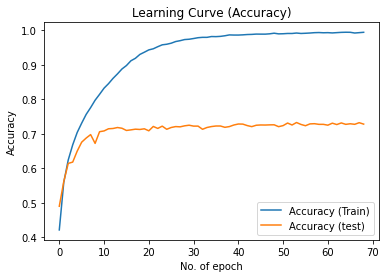

In [31]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

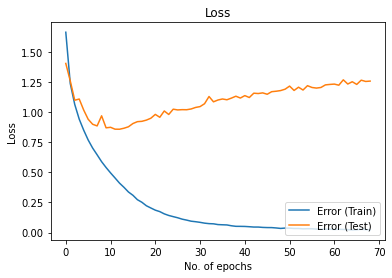

In [32]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 4

Dropout and batch normalization layers will be added for this model

In [33]:
#model 4, dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 5s - loss: 1.7567 - accuracy: 0.3947 - val_loss: 1.7520 - val_accuracy: 0.3893
Epoch 2/100
500/500 - 4s - loss: 1.3561 - accuracy: 0.5141 - val_loss: 1.2919 - val_accuracy: 0.5339
Epoch 3/100
500/500 - 3s - loss: 1.2253 - accuracy: 0.5644 - val_loss: 1.3626 - val_accuracy: 0.5167
Epoch 4/100
500/500 - 4s - loss: 1.1208 - accuracy: 0.6015 - val_loss: 1.0559 - val_accuracy: 0.6260
Epoch 5/100
500/500 - 4s - loss: 1.0363 - accuracy: 0.6340 - val_loss: 1.1246 - val_accuracy: 0.6016
Epoch 6/100
500/500 - 3s - loss: 0.9781 - accuracy: 0.6554 - val_loss: 1.1254 - val_accuracy: 0.6107
Epoch 7/100
500/500 - 3s - loss: 0.9175 - accuracy: 0.6796 - val_loss: 0.9936 - val_accuracy: 0.6499
Epoch 8/100
500/500 - 4s - loss: 0.8749 - accuracy: 0.6892 - val_loss: 0.9985 - val_accuracy: 0.6426
Epoch 9/100
500/500 - 4s - loss: 0.8298 - accuracy: 0.7074 - val_loss: 0.8963 - val_accuracy: 0.6817
Epoch 10/100
500/500 - 4s - loss: 0.8023 - accuracy: 0.7163 - val_loss: 0.9869 - val_accura

In [35]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 18.10%


Error has improved, so has the precision.
Model seems to have problems identifying cats the most

In [36]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.86      0.81      0.83      1000
  automobile       0.94      0.88      0.91      1000
        bird       0.81      0.70      0.75      1000
         cat       0.67      0.63      0.65      1000
        deer       0.72      0.87      0.79      1000
         dog       0.76      0.72      0.74      1000
        frog       0.83      0.91      0.87      1000
       horse       0.88      0.85      0.86      1000
        ship       0.87      0.92      0.89      1000
       truck       0.87      0.91      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



The curves for both test and train sets are similiar up until a point where they diverge like previous models
However, the divergence is after quite a number of epochs.
Model has probably improved

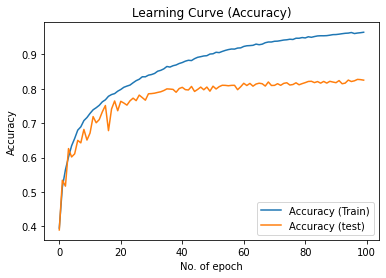

In [37]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

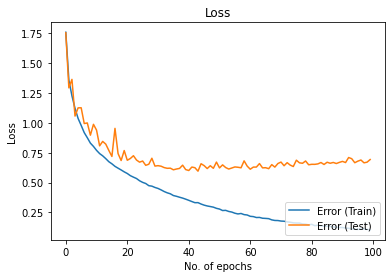

In [38]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 5
Model 5 will use a larger dropout rate of 0.4

In [39]:
#model 5
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 6s - loss: 2.0537 - accuracy: 0.3011 - val_loss: 1.6856 - val_accuracy: 0.3798
Epoch 2/100
500/500 - 4s - loss: 1.5712 - accuracy: 0.4305 - val_loss: 1.4174 - val_accuracy: 0.4833
Epoch 3/100
500/500 - 4s - loss: 1.4131 - accuracy: 0.4893 - val_loss: 1.5194 - val_accuracy: 0.4575
Epoch 4/100
500/500 - 4s - loss: 1.3290 - accuracy: 0.5207 - val_loss: 1.2592 - val_accuracy: 0.5466
Epoch 5/100
500/500 - 3s - loss: 1.2418 - accuracy: 0.5536 - val_loss: 1.2995 - val_accuracy: 0.5322
Epoch 6/100
500/500 - 4s - loss: 1.1826 - accuracy: 0.5755 - val_loss: 1.2858 - val_accuracy: 0.5395
Epoch 7/100
500/500 - 4s - loss: 1.1270 - accuracy: 0.5934 - val_loss: 1.0755 - val_accuracy: 0.6120
Epoch 8/100
500/500 - 3s - loss: 1.0770 - accuracy: 0.6144 - val_loss: 1.1583 - val_accuracy: 0.5836
Epoch 9/100
500/500 - 4s - loss: 1.0435 - accuracy: 0.6275 - val_loss: 1.1192 - val_accuracy: 0.5989
Epoch 10/100
500/500 - 4s - loss: 1.0166 - accuracy: 0.6362 - val_loss: 1.0950 - val_accura

In [41]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 18.33%


Although accuracy is worse, the range of precision for each class is not as great as previous models
The error is also quite good, now down to 2 thirds of the origional model

In [42]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.87      0.79      0.83      1000
  automobile       0.95      0.86      0.91      1000
        bird       0.81      0.67      0.74      1000
         cat       0.68      0.64      0.66      1000
        deer       0.74      0.87      0.80      1000
         dog       0.75      0.72      0.73      1000
        frog       0.74      0.94      0.83      1000
       horse       0.91      0.83      0.87      1000
        ship       0.86      0.93      0.90      1000
       truck       0.88      0.92      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



Test error curve does not diverge greatly from the train curve but insetead adheres to it quit well. 
This is the best model created here

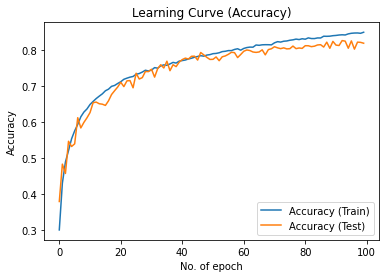

In [43]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

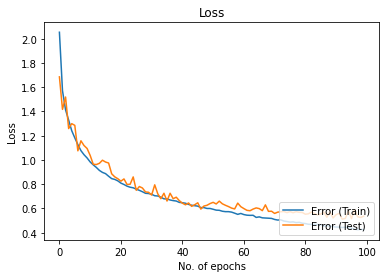

In [44]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()